In [199]:
pylab inline


SyntaxError: invalid syntax (<ipython-input-199-b794e5809f34>, line 1)

In [245]:
try:
    reload(dc)
except Exception:
    print 'dc not loaded yet'
    

In [246]:
import dnnConnectivityAndMemoryAllocation as dc

# Create memory
memory = dc.Memory(2,32,8,4096)

# Create DNN
network = dc.Network()
#                                    X    Y    Z    Kx   Ky   Kz   stride
# network.addLayer('Input',          224, 224,    3                      ) #    3 
# network.addLayer('Convolutional',   55,  55,   96,   11,  11,    3,   4 ) #   96,
# network.addLayer('Convolutional',   27,  27,  256,    5,   5,   96,   2 ) #  256,
# network.addLayer('Convolutional',   13,  13,  384,    3,   3,  256,   2 ) #  384,
# network.addLayer('Convolutional',   13,  13,  384,    3,   3,  384,   1 ) #  384,
# network.addLayer('Fully Connected', 13,  13,  256,    3,   3,  384,   1 ) #  256,
# network.addLayer('Fully Connected',  1,   1, 4096,   13,  13,  256,   1 ) # 4096,
# network.addLayer('Fully Connected',  1,   1, 4096,    1,   1, 4096,   1 ) # 4096,
# network.addLayer('Fully Connected',  1,   1, 1024,    1,   1, 4096,   1 ) # 1024,

#network.addLayer('Input',          224, 224,    3                      ) #    3 
#network.addLayer('Convolutional',   55,  55,   10,   11,  11,    3,   4 ) #   96,
network.addLayer('Input',           55,  55,   10,                      ) #   96,
network.addLayer('Convolutional',   27,  27,    5,    5,   5,   10,   2 ) #  256,
#network.addLayer('Convolutional',   13,  13,   10,    3,   3,    5,   2 ) #  384,
#network.addLayer('Convolutional',   13,  13,    8,    3,   3,   10,   1 ) #  384,
#network.addLayer('Fully Connected', 13,  13,    6,    3,   3,    8,   1 ) #  256,
#network.addLayer('Fully Connected',  1,   1,    6,   13,  13,    6,   1 ) # 4096,
#network.addLayer('Fully Connected',  1,   1,    4,    1,   1,    6,   1 ) # 4096,
#network.addLayer('Fully Connected',  1,   1,    4,    1,   1,    4,   1 ) # 1024,
network.assignPEs()






Layer  0  left Kernel offset is  0 , top Kernel offset is  0
Layer  1  left Kernel offset is  -1 , top Kernel offset is  -1


In [247]:
for l in range(1, network.numberOfLayers):
  network.Layers[l].generateConnections()


Updating Layer 1 connections for features in row :0
Updating Layer 1 connections for features in row :1
Updating Layer 1 connections for features in row :2
Updating Layer 1 connections for features in row :3
Updating Layer 1 connections for features in row :4
Updating Layer 1 connections for features in row :5
Updating Layer 1 connections for features in row :6
Updating Layer 1 connections for features in row :7
Updating Layer 1 connections for features in row :8
Updating Layer 1 connections for features in row :9
Updating Layer 1 connections for features in row :10
Updating Layer 1 connections for features in row :11
Updating Layer 1 connections for features in row :12
Updating Layer 1 connections for features in row :13
Updating Layer 1 connections for features in row :14
Updating Layer 1 connections for features in row :15
Updating Layer 1 connections for features in row :16
Updating Layer 1 connections for features in row :17
Updating Layer 1 connections for features in row :18
Upd

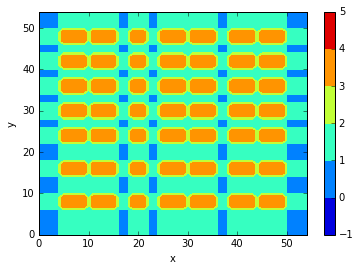

In [248]:
network.Layers[0].displayTargetPECounts()


In [249]:
lid = 0
numOfPEs = network.Layers[lid].getTargetPECounts()


In [250]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)
#print numOfPEs
np.set_printoptions(threshold=1000)



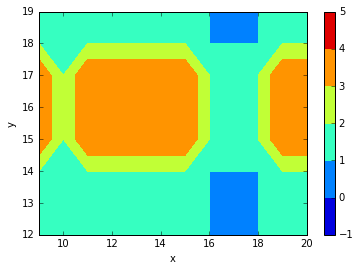

In [251]:
#region = np.array([50,65,45,65])
region = np.array([12,20,9,21])
network.Layers[0].displayTargetPECountsRegion(region)

In [252]:
network.peArray.pe[4][4].memCpyROI(1)

In [253]:
print network.peArray.pe[4][4].roiCells[1][9][0][0]



Cell
ID{Z,Y,X} : 9,29,25
PE{Y,X} : 4,3
Methods: ['findROI']
Fields: ['targetPEs', 'roiFromAssign', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'sourceCells']


In [254]:
network.peArray.pe[4][4].roiCells[1][9][0][0]

array(<dnnConnectivityAndMemoryAllocation.Cell instance at 0x135a44248>, dtype=object)

In [256]:
network.Layers[0].cells[9][29][25]

<dnnConnectivityAndMemoryAllocation.Cell instance at 0x135a44248>

In [268]:
network.Layers[0].cells[9][29][25].X = 55

In [270]:
print network.peArray.pe[4][4].roiCells[1][9][0][0]


Cell
ID{Z,Y,X} : 9,29,55
PE{Y,X} : 4,3
Methods: ['findROI']
Fields: ['targetPEs', 'roiFromAssign', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'sourceCells']


In [272]:
print network.Layers[0].cells[9][29][25]


Cell
ID{Z,Y,X} : 9,29,55
PE{Y,X} : 4,3
Methods: ['findROI']
Fields: ['targetPEs', 'roiFromAssign', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'sourceCells']
